## load cadana database

In [11]:
import pandas

canada_db = pandas.read_csv('./data/ds_canada/2. SOC_Database.csv')

canada_db

,SampleID,SOC (%),Catch,Conv,Elev,DevME A,DevME B,DevME C,DevME D,DiffME A,DiffME B,DiffME C,DiffME D,EDF MID,EDF NE,EDF NW,EDF SE,EDF SW,EDF E,EDF N,Gcurv,Hillshade,LS,MDM A,MDM B,MDM C,MDMS A,MDMS B,MDMS C,MED A,MED B,MED C,MEDS A,MEDS B,MEDS C,MRRTF,MRVBF,MSP,MSTPI,NormH,Plan,Pro,RSP,SLength,SlopeH,Slope,SPI,StanH,SVF,SWI,TCurv,TPI,TRI,TWI,VDepth,VIS,NDVI_max,NDVI_median,NDVI_sd,X (DD),Y (DD)
0,1,4.88,105.560303,-1.695651,397.309113,-0.242336,-0.019693,-0.416003,-1.223508,-0.042645,-0.008254,-0.804703,-6.168180,400.140595,1777.670532,1640.156250,1276.758545,1077.085205,1117.5,1382.5,-0.002908,0.765437,0.194416,-0.103770,-3.880643,-8.404779,19,59,199,-0.291811,-0.883678,-1.761287,3,59,199,1.885042,7.949381,0.823812,-0.204847,0.088094,-0.007362,-0.001317,0.009522,14.142136,0.937555,0.018518,1.955000,393.989716,0.999042,10.692186,1.860000e-06,-0.025165,0.059154,8.648174,9.705094,98.230995,0.876076,0.694713,0.164614,-80.269163,43.707232
1,2,4.76,11756.406250,-12.779182,397.207977,-0.778743,-0.452079,-0.494462,-1.258175,-0.106777,-0.159320,-0.937874,-6.308767,382.900116,1759.719482,1632.976563,1275.387207,1093.897827,1107.5,1367.5,-0.001990,0.771677,0.112488,-0.238011,-4.042815,-8.545197,19,59,199,-0.761379,-0.915616,-1.789968,6,59,199,0.059002,7.948594,0.835849,-0.498907,0.082076,-0.060868,-0.000596,0.000000,99.497475,0.923268,0.006549,76.993629,393.959503,0.999126,10.640995,6.870000e-07,-0.180933,0.021448,14.400584,10.325721,98.319786,0.915627,0.613926,0.210947,-80.269013,43.707365
2,3,5.10,2824.329590,-0.521328,397.390015,-0.171732,-0.254896,-0.437166,-1.231417,-0.031157,-0.092313,-0.798167,-6.150780,369.272949,1742.516113,1632.900024,1267.423584,1111.918335,1092.5,1357.5,-0.000437,0.762880,0.168370,-0.136837,-3.883872,-8.405158,19,59,199,-0.289766,-0.884169,-1.759826,8,59,199,0.499848,7.947878,0.837425,-0.171007,0.081287,-0.010279,-0.000097,0.000000,240.061050,0.836139,0.011800,33.327625,393.971497,0.999088,10.545659,2.280000e-07,-0.111542,0.037374,12.385666,9.450062,98.371185,0.927210,0.646960,0.234737,-80.268867,43.707490
3,4,5.70,5295.354492,3.123698,397.513275,0.009115,0.044004,-0.394856,-1.225852,0.001653,0.017007,-0.716329,-6.083858,347.437042,1720.672119,1621.947144,1269.138428,1131.685669,1082.5,1337.5,-0.000215,0.755102,0.151364,-0.024147,-3.823014,-8.325336,19,59,199,0.041162,-0.863998,-1.742531,9,59,199,1.560108,7.946214,0.829993,0.022076,0.085003,0.019732,-0.000303,0.000000,804.766235,0.811543,0.009913,52.496277,393.995819,0.999032,10.352956,1.320000e-07,0.000611,0.031468,13.188428,8.735661,98.379845,0.915750,0.711604,0.183207,-80.268703,43.707638
4,5,5.11,6871.969727,2.661578,397.637207,0.072724,0.113439,-0.366388,-1.215629,0.014545,0.043764,-0.656052,-5.999730,329.488251,1699.577148,1618.197266,1264.342773,1152.632813,1067.5,1322.5,0.000344,0.737068,0.197751,0.057754,-3.729191,-8.246554,13,59,199,0.121949,-0.844963,-1.725515,11,59,199,2.531255,7.944658,0.817843,0.076349,0.091078,0.014275,-0.000015,0.003832,0.000000,0.854388,0.013132,90.245605,394.030457,0.998977,10.261889,6.350000e-08,0.057567,0.041576,13.167877,8.526403,98.394020,0.934996,0.651558,0.271645,-80.268508,43.707771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1.63,169.625778,1.168782,405.551361,-0.013676,0.177649,0.746808,0.316329,-0.018182,0.352540,2.170702,1.419406,318.296234,1382.502319,1726.647705,1105.130127,1513.708252,732.5,1172.5,-0.001350,0.457335,0.717111,1.557392,2.444317,2.342518,19,50,60,0.602551,0.745566,0.587271,19,30,60,2.674510,1.279167,0.576417,-0.095086,0.788208,0.010066,-0.001563,0.551225,35.355339,6.271545,0.089824,15.277517,403.034790,0.997302,5.424111,3.470000e-06,1.307380,0.284868,7.540807,1.685164,97.465759,0.946501,0.601615,0.312782,-80.264381,43.709098
836,837,1.62,194.982132,1.109466,405.171936,-0.065693,0.059607,

## adding satellite image data

In [12]:
import rasterio

raster = rasterio.open("./data/sentinel_images/eca6374937ae5f499c4b13e5c83a08f6/response.tiff")

print(raster.count)
print(raster.shape)

min_x_gps, min_y_gps = raster.xy(0, 0)
max_x_gps, max_y_gps = raster.xy(raster.shape[0], raster.shape[1])

print(min_x_gps, min_y_gps)
print(max_x_gps, max_y_gps)

13
(2378, 1993)
-80.26999749121926 43.71249821278385
-80.25999749121927 43.70399821278385


In [13]:
from scipy.interpolate import interp1d

from_gps_to_raster_x = interp1d([min_x_gps, max_x_gps], [0, raster.shape[0]])
from_gps_to_raster_y = interp1d([min_y_gps, max_y_gps], [0, raster.shape[1]])

def add_column_by_band(band, band_name):
    values = []
    for j in canada_db.index:
        x = canada_db['X (DD)'].iloc[j]
        y = canada_db['Y (DD)'].iloc[j]
        x_raster = round(float(from_gps_to_raster_x(x)))
        y_raster = round(float(from_gps_to_raster_y(y)))
        value = band[x_raster][y_raster]
        values.append(value)
    canada_db[band_name] = values

for i in range(1, raster.count + 1):
    band = raster.read(i)
    add_column_by_band(band, "band_" + str(i))

# adding ndvi
band_red = raster.read(4)
band_nir = raster.read(8)
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)
add_column_by_band(ndvi, "ndvi")

raster.close()

canada_db

,SampleID,SOC (%),Catch,Conv,Elev,DevME A,DevME B,DevME C,DevME D,DiffME A,DiffME B,DiffME C,DiffME D,EDF MID,EDF NE,EDF NW,EDF SE,EDF SW,EDF E,EDF N,Gcurv,Hillshade,LS,MDM A,MDM B,MDM C,MDMS A,MDMS B,MDMS C,MED A,MED B,MED C,MEDS A,MEDS B,MEDS C,MRRTF,MRVBF,MSP,MSTPI,NormH,Plan,Pro,RSP,SLength,SlopeH,Slope,SPI,StanH,SVF,SWI,TCurv,TPI,TRI,TWI,VDepth,VIS,NDVI_max,NDVI_median,NDVI_sd,X (DD),Y (DD),band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,band_10,band_11,band_12,band_13,ndvi
0,1,4.88,105.560303,-1.695651,397.309113,-0.242336,-0.019693,-0.416003,-1.223508,-0.042645,-0.008254,-0.804703,-6.168180,400.140595,1777.670532,1640.156250,1276.758545,1077.085205,1117.5,1382.5,-0.002908,0.765437,0.194416,-0.103770,-3.880643,-8.404779,19,59,199,-0.291811,-0.883678,-1.761287,3,59,199,1.885042,7.949381,0.823812,-0.204847,0.088094,-0.007362,-0.001317,0.009522,14.142136,0.937555,0.018518,1.955000,393.989716,0.999042,10.692186,1.860000e-06,-0.025165,0.059154,8.648174,9.705094,98.230995,0.876076,0.694713,0.164614,-80.269163,43.707232,1138,896,788,512,762,2349,3349,3167,3641,947,9,1557,637,0.721663
1,2,4.76,11756.406250,-12.779182,397.207977,-0.778743,-0.452079,-0.494462,-1.258175,-0.106777,-0.159320,-0.937874,-6.308767,382.900116,1759.719482,1632.976563,1275.387207,1093.897827,1107.5,1367.5,-0.001990,0.771677,0.112488,-0.238011,-4.042815,-8.545197,19,59,199,-0.761379,-0.915616,-1.789968,6,59,199,0.059002,7.948594,0.835849,-0.498907,0.082076,-0.060868,-0.000596,0.000000,99.497475,0.923268,0.006549,76.993629,393.959503,0.999126,10.640995,6.870000e-07,-0.180933,0.021448,14.400584,10.325721,98.319786,0.915627,0.613926,0.210947,-80.269013,43.707365,1138,903,803,519,739,2374,3401,3170,3800,947,9,1507,614,0.718623
2,3,5.10,2824.329590,-0.521328,397.390015,-0.171732,-0.254896,-0.437166,-1.231417,-0.031157,-0.092313,-0.798167,-6.150780,369.272949,1742.516113,1632.900024,1267.423584,1111.918335,1092.5,1357.5,-0.000437,0.762880,0.168370,-0.136837,-3.883872,-8.405158,19,59,199,-0.289766,-0.884169,-1.759826,8,59,199,0.499848,7.947878,0.837425,-0.171007,0.081287,-0.010279,-0.000097,0.000000,240.061050,0.836139,0.011800,33.327625,393.971497,0.999088,10.545659,2.280000e-07,-0.111542,0.037374,12.385666,9.450062,98.371185,0.927210,0.646960,0.234737,-80.268867,43.707490,1138,896,805,526,742,2437,3565,3258,3902,947,9,1514,605,0.721987
3,4,5.70,5295.354492,3.123698,397.513275,0.009115,0.044004,-0.394856,-1.225852,0.001653,0.017007,-0.716329,-6.083858,347.437042,1720.672119,1621.947144,1269.138428,1131.685669,1082.5,1337.5,-0.000215,0.755102,0.151364,-0.024147,-3.823014,-8.325336,19,59,199,0.041162,-0.863998,-1.742531,9,59,199,1.560108,7.946214,0.829993,0.022076,0.085003,0.019732,-0.000303,0.000000,804.766235,0.811543,0.009913,52.496277,393.995819,0.999032,10.352956,1.320000e-07,0.000611,0.031468,13.188428,8.735661,98.379845,0.915750,0.711604,0.183207,-80.268703,43.707638,1138,893,796,522,724,2471,3660,3380,3966,947,9,1504,587,0.732445
4,5,5.11,6871.969727,2.661578,397.637207,0.072724,0.113439,-0.366388,-1.215629,0.014545,0.043764,-0.656052,-5.999730,329.488251,1699.577148,1618.197266,1264.342773,1152.632813,1067.5,1322.5,0.000344,0.737068,0.197751,0.057754,-3.729191,-8.246554,13,59,199,0.121949,-0.844963,-1.725515,11,59,199,2.531255,7.944658,0.817843,0.076349,0.091078,0.014275,-0.000015,0.003832,0.000000,0.854388,0.013132,90.245605,394.030457,0.998977,10.261889,6.350000e-08,0.057567,0.041576,13.167877,8.526403,98.394020,0.934996,0.651558,0.271645,-80.268508,43.707771,1144,882,770,496,695,2536,3965,3854,4326,1005,9,1524,577,0.771954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1.63,169.625778,1.168782,405.551361,-0.013676,0.177649,0.746808,0.316329,-0.018182,0.352540,2.170702,1.419406,3

## adding hwsd data

In [14]:
import rasterio

raster = rasterio.open("./data/fao/hwsd/HWSD_RASTER/hwsd.bil").read(1)

print(raster.shape)

(21600, 43200)


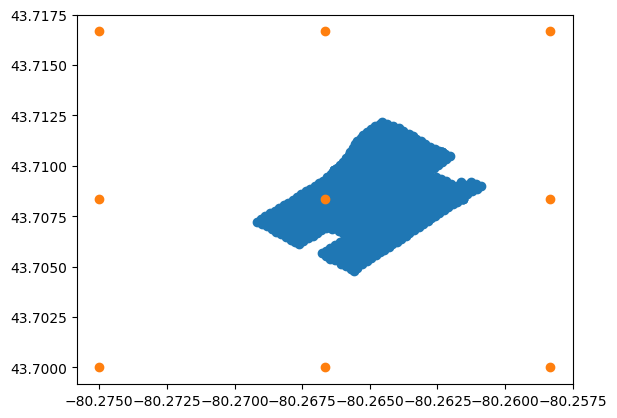

In [15]:
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import math

from_raster_to_gps_i = interp1d([0, raster.shape[0]], [90, -90])
from_raster_to_gps_j = interp1d([0, raster.shape[1]], [-180, 180])
from_gps_to_raster_i = interp1d([90, -90], [0, raster.shape[0]])
from_gps_to_raster_j = interp1d([-180, 180], [0, raster.shape[1]])

points = set()

for index in canada_db.index:
    x = float(canada_db['X (DD)'].iloc[index])
    y = float(canada_db['Y (DD)'].iloc[index])

    x_raster = from_gps_to_raster_j(x)
    y_raster = from_gps_to_raster_i(y)

    x_raster_down = math.floor(x_raster)
    x_raster_up = math.ceil(x_raster)

    y_raster_down = math.floor(y_raster)
    y_raster_up = math.ceil(y_raster)

    points.add((x_raster_down, y_raster_down))
    points.add((x_raster_down, y_raster_up))
    points.add((x_raster_up, y_raster_down))
    points.add((x_raster_up, y_raster_up))

x = [from_raster_to_gps_j(elem[0]) for elem in points]
y = [from_raster_to_gps_i(elem[1]) for elem in points]

plt.scatter(canada_db['X (DD)'], canada_db['Y (DD)'])
plt.scatter(x, y)

In [16]:
import pyodbc
import pandas

MDB = './data/fao/hwsd/HWSD.mdb'
DRV = '{Microsoft Access Driver (*.mdb, *.accdb)}'

con = pyodbc.connect('DRIVER={};DBQ={}'.format(DRV,MDB))
cur = con.cursor()
rows = cur.execute('SELECT * FROM HWSD_DATA;').fetchall()

columns = [column[0] for column in cur.description]

cur.close()
con.close()

df = pandas.DataFrame((tuple(t) for t in rows))
df.columns = columns

df

,ID,MU_GLOBAL,MU_SOURCE1,MU_SOURCE2,ISSOIL,SHARE,SEQ,SU_SYM74,SU_CODE74,SU_SYM85,SU_CODE85,SU_SYM90,SU_CODE90,T_TEXTURE,DRAINAGE,REF_DEPTH,AWC_CLASS,PHASE1,PHASE2,ROOTS,IL,SWR,ADD_PROP,T_GRAVEL,T_SAND,T_SILT,T_CLAY,T_USDA_TEX_CLASS,T_REF_BULK_DENSITY,T_BULK_DENSITY,T_OC,T_PH_H2O,T_CEC_CLAY,T_CEC_SOIL,T_BS,T_TEB,T_CACO3,T_CASO4,T_ESP,T_ECE,S_GRAVEL,S_SAND,S_SILT,S_CLAY,S_USDA_TEX_CLASS,S_REF_BULK_DENSITY,S_BULK_DENSITY,S_OC,S_PH_H2O,S_CEC_CLAY,S_CEC_SOIL,S_BS,S_TEB,S_CACO3,S_CASO4,S_ESP,S_ECE
0,2,7002,2,2.0,0,100.0,1,None,NaN,HD,227.0,HD,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,7003,3,3.0,0,100.0,1,None,NaN,WR,230.0,WR,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,7004,4,4.0,0,100.0,1,None,NaN,Od,156.0,HSf,89.0,3.0,1.0,100.0,1.0,7.0,NaN,5.0,1.0,4.0,0.0,1.0,20.0,40.0,40.0,3.0,1.26,0.10,33.63,4.3,45.0,77.0,62.0,31.4,0.0,0.0,2.0,0.1,2.0,47.0,26.0,27.0,10.0,1.38,0.10,32.89,4.6,71.0,78.0,40.0,27.4,0.0,0.0,1.0,0.1
3,5,7005,5,5.0,0,100.0,1,None,NaN,GG,231.0,GG,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,7006,70001,70001.0,1,70.0,1,None,NaN,Tv,197.0,ANz,35.0,1.0,5.0,100.0,4.0,25.0,1.0,1.0,1.0,1.0,0.0,4.0,74.0,21.0,5.0,11.0,1.68,0.99,3.27,5.8,135.0,17.0,34.0,5.5,0.0,0.0,1.0,0.1,10.0,75.0,21.0,4.0,12.0,1.71,0.97,1.85,5.9,146.0,10.0,23.0,5.3,0.0,0.0,1.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48143,48145,32049,TN249,NaN,1,20.0,4,None,NaN,None,NaN,LPe,98.0,2.0,3.0,30.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,19.0,52.0,28.0,20.0,9.0,1.43,1.30,0.22,7.2,62.0,13.0,89.0,11.6,5.0,0.1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48144,48146,32050,TN250,NaN,1,50.0,1,None,NaN,None,NaN,LPe,98.0,2.0,3.0,30.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,19.0,52.0,28.0,20.0,9.0,1.43,1.30,0.22,7.2,62.0,13.0,89.0,11.6,5.0,0.1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48145,48147,32050,TN250,NaN,1,30.0,2,None,NaN,None,NaN,ARc,44.0,1.0,6.0,100.0,3.0,NaN,NaN,NaN,NaN,NaN,0.0,4.0,88.0,6.0,6.0,12.0,1.68,1.50,0.20,8.3,56.0,4.0,100.0,4.0,6.0,0.1,3.0,1.0,4.0,88.0,5.0,7.0,12.0,1.65,1.49,0.13,8.5,37.0,3.0,100.0,3.1,5.7,0.1,4.0,1.0
48146,48148,32050,TN250,NaN,1,20.0,3,None,NaN,None,NaN,RGe,156.0,1.0,6.0,100.0,3.0,NaN,NaN,NaN,NaN,NaN,0.0,10.0,83.0,12.0,5.0,12.0,1.69,1.16,0.39,8.7,0.0,5.0,97.0,4.5,3.0,0.1,3.0,1.0,13.0,72.0,18.0,10.0,11.0,1.57,1.14,0.18,8.7,27.0,4.0,90.0,3.6,3.0,0.2,2.0,0.1


In [17]:
mp = pandas.DataFrame(columns = columns)

for point in points:
    rows = df[df['MU_GLOBAL'] == raster[point[1]][point[0]]]
    mp = pandas.concat([mp, rows])

mp.drop_duplicates(inplace=True)
mp

C:\Users\EBELLIMTP\AppData\Local\Temp\ipykernel_20956\1326168294.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mp = pandas.concat([mp, rows])


,ID,MU_GLOBAL,MU_SOURCE1,MU_SOURCE2,ISSOIL,SHARE,SEQ,SU_SYM74,SU_CODE74,SU_SYM85,SU_CODE85,SU_SYM90,SU_CODE90,T_TEXTURE,DRAINAGE,REF_DEPTH,AWC_CLASS,PHASE1,PHASE2,ROOTS,IL,SWR,ADD_PROP,T_GRAVEL,T_SAND,T_SILT,T_CLAY,T_USDA_TEX_CLASS,T_REF_BULK_DENSITY,T_BULK_DENSITY,T_OC,T_PH_H2O,T_CEC_CLAY,T_CEC_SOIL,T_BS,T_TEB,T_CACO3,T_CASO4,T_ESP,T_ECE,S_GRAVEL,S_SAND,S_SILT,S_CLAY,S_USDA_TEX_CLASS,S_REF_BULK_DENSITY,S_BULK_DENSITY,S_OC,S_PH_H2O,S_CEC_CLAY,S_CEC_SOIL,S_BS,S_TEB,S_CACO3,S_CASO4,S_ESP,S_ECE
43970,43972,4847,4847,NaN,1,100.0,1,La,83.0,None,NaN,None,NaN,2.0,4.0,100.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,10.0,37.0,44.0,19.0,9.0,1.41,1.42,0.82,6.0,53.0,14.0,83.0,16.3,0.0,0.0,1.0,0.1,19.0,33.0,35.0,32.0,5.0,1.32,1.58,0.39,6.3,56.0,21.0,89.0,18.1,0.0,0.0,1.0,0.1


In [18]:
selected_columns = mp.columns[23:] # filter columns

for column in selected_columns:
    canada_db[column] = [mp[column].iloc[0]] * len(canada_db.index)

canada_db = canada_db.drop('SampleID', axis = 1)

canada_db

,SOC (%),Catch,Conv,Elev,DevME A,DevME B,DevME C,DevME D,DiffME A,DiffME B,DiffME C,DiffME D,EDF MID,EDF NE,EDF NW,EDF SE,EDF SW,EDF E,EDF N,Gcurv,Hillshade,LS,MDM A,MDM B,MDM C,MDMS A,MDMS B,MDMS C,MED A,MED B,MED C,MEDS A,MEDS B,MEDS C,MRRTF,MRVBF,MSP,MSTPI,NormH,Plan,Pro,RSP,SLength,SlopeH,Slope,SPI,StanH,SVF,SWI,TCurv,TPI,TRI,TWI,VDepth,VIS,NDVI_max,NDVI_median,NDVI_sd,X (DD),Y (DD),band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,band_10,band_11,band_12,band_13,ndvi,T_GRAVEL,T_SAND,T_SILT,T_CLAY,T_USDA_TEX_CLASS,T_REF_BULK_DENSITY,T_BULK_DENSITY,T_OC,T_PH_H2O,T_CEC_CLAY,T_CEC_SOIL,T_BS,T_TEB,T_CACO3,T_CASO4,T_ESP,T_ECE,S_GRAVEL,S_SAND,S_SILT,S_CLAY,S_USDA_TEX_CLASS,S_REF_BULK_DENSITY,S_BULK_DENSITY,S_OC,S_PH_H2O,S_CEC_CLAY,S_CEC_SOIL,S_BS,S_TEB,S_CACO3,S_CASO4,S_ESP,S_ECE
0,4.88,105.560303,-1.695651,397.309113,-0.242336,-0.019693,-0.416003,-1.223508,-0.042645,-0.008254,-0.804703,-6.168180,400.140595,1777.670532,1640.156250,1276.758545,1077.085205,1117.5,1382.5,-0.002908,0.765437,0.194416,-0.103770,-3.880643,-8.404779,19,59,199,-0.291811,-0.883678,-1.761287,3,59,199,1.885042,7.949381,0.823812,-0.204847,0.088094,-0.007362,-0.001317,0.009522,14.142136,0.937555,0.018518,1.955000,393.989716,0.999042,10.692186,1.860000e-06,-0.025165,0.059154,8.648174,9.705094,98.230995,0.876076,0.694713,0.164614,-80.269163,43.707232,1138,896,788,512,762,2349,3349,3167,3641,947,9,1557,637,0.721663,10.0,37.0,44.0,19.0,9.0,1.41,1.42,0.82,6.0,53.0,14.0,83.0,16.3,0.0,0.0,1.0,0.1,19.0,33.0,35.0,32.0,5.0,1.32,1.58,0.39,6.3,56.0,21.0,89.0,18.1,0.0,0.0,1.0,0.1
1,4.76,11756.406250,-12.779182,397.207977,-0.778743,-0.452079,-0.494462,-1.258175,-0.106777,-0.159320,-0.937874,-6.308767,382.900116,1759.719482,1632.976563,1275.387207,1093.897827,1107.5,1367.5,-0.001990,0.771677,0.112488,-0.238011,-4.042815,-8.545197,19,59,199,-0.761379,-0.915616,-1.789968,6,59,199,0.059002,7.948594,0.835849,-0.498907,0.082076,-0.060868,-0.000596,0.000000,99.497475,0.923268,0.006549,76.993629,393.959503,0.999126,10.640995,6.870000e-07,-0.180933,0.021448,14.400584,10.325721,98.319786,0.915627,0.613926,0.210947,-80.269013,43.707365,1138,903,803,519,739,2374,3401,3170,3800,947,9,1507,614,0.718623,10.0,37.0,44.0,19.0,9.0,1.41,1.42,0.82,6.0,53.0,14.0,83.0,16.3,0.0,0.0,1.0,0.1,19.0,33.0,35.0,32.0,5.0,1.32,1.58,0.39,6.3,56.0,21.0,89.0,18.1,0.0,0.0,1.0,0.1
2,5.10,2824.329590,-0.521328,397.390015,-0.171732,-0.254896,-0.437166,-1.231417,-0.031157,-0.092313,-0.798167,-6.150780,369.272949,1742.516113,1632.900024,1267.423584,1111.918335,1092.5,1357.5,-0.000437,0.762880,0.168370,-0.136837,-3.883872,-8.405158,19,59,199,-0.289766,-0.884169,-1.759826,8,59,199,0.499848,7.947878,0.837425,-0.171007,0.081287,-0.010279,-0.000097,0.000000,240.061050,0.836139,0.011800,33.327625,393.971497,0.999088,10.545659,2.280000e-07,-0.111542,0.037374,12.385666,9.450062,98.371185,0.927210,0.646960,0.234737,-80.268867,43.707490,1138,896,805,526,742,2437,3565,3258,3902,947,9,1514,605,0.721987,10.0,37.0,44.0,19.0,9.0,1.41,1.42,0.82,6.0,53.0,14.0,83.0,16.3,0.0,0.0,1.0,0.1,19.0,33.0,35.0,32.0,5.0,1.32,1.58,0.39,6.3,56.0,21.0,89.0,18.1,0.0,0.0,1.0,0.1
3,5.70,5295.354492,3.123698,397.513275,0.009115,0.044004,-0.394856,-1.225852,0.001653,0.017007,-0.716329,-6.083858,347.437042,1720.672119,1621.947144,1269.138428,1131.685669,1082.5,1337.5,-0.000215,0.755102,0.151364,-0.024147,-3.823014,-8.325336,19,59,199,0.041162,-0.863998,-1.742531,9,59,199,1.560108,7.946214,0.829993,0.022076,0.085003,0.019732,-0.000303,0.000000,804.766235,0.811543,0.009913,52.496277,393.995819,0.999032,10.352956,1.320000e-07,0.000611,0.031468,13.188428,8.735661,98.379845,0.915750,0.711604,0.183207,-80.268703,43.707638,1138,893,796,522,724,2471,3660,3380,3966,947,9,1504,587,0.732445,10.0,37.0,44.0,19.0,9.0,1.41,1.42,0.82,6.0,53.0,14.0,83.0,16.3,0.0,0.0,1.0,0.1,19.0,33.0,35.0,32.0,5.0,1.32,1.58,0.39,6.3,56.0,21.0,89.0,18.1,0.0,0.0,1.0,0.1
4,5.11,6871.969727,2.661578,397.637207,0.072724,0.113439,-0.366388,-1.215629,0.014545,0.043764,-0.656052,

In [19]:
canada_db.to_csv("./data/ds_canada/dataset.csv", index=False)